Adam Prado
Pace U. Data Science
3/3/24

## Chapter 4 Application #14

importing all of the libraries

In [78]:
import numpy as np 
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 


14)  Download dataset for Auto

In [79]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a) Find the median of "mpg" so that I can make a classifcation variable "mpg01" for cars that are above or below the median.

In [80]:
mpg_median = Auto["mpg"].median()
mpg_median

22.75

a) creates new column, "mpg01" that saves a 1 if the mpg is above the median and 0 if it's below the median.

In [81]:

Auto["mpg01"] = (Auto["mpg"] > mpg_median).astype(int)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


b) Explore the data graphically
First is a scatter plot matrix of all of the pairs of variables. 

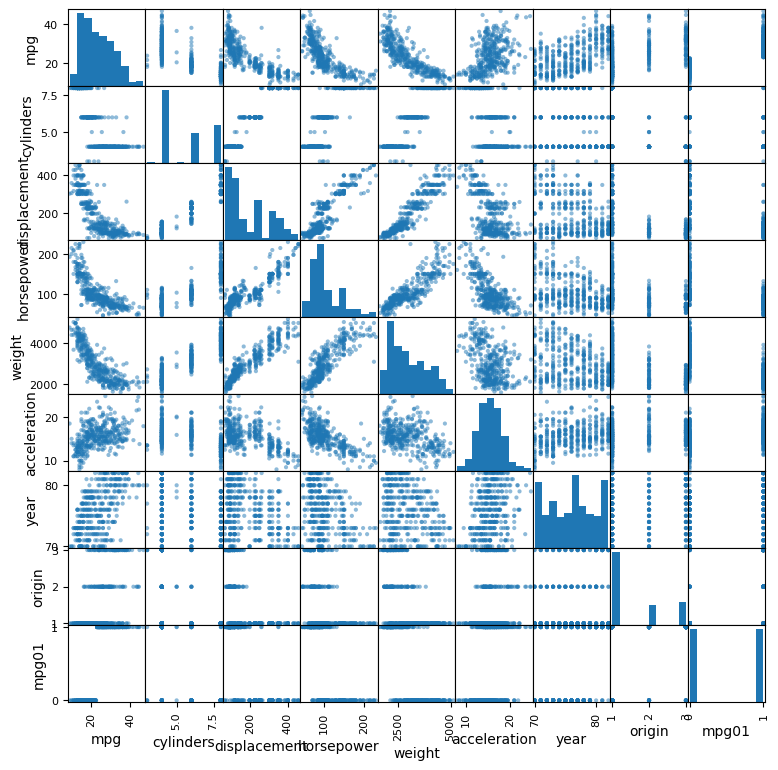

In [82]:
pd.plotting.scatter_matrix(Auto, figsize=(9,9)) ;

b)  Then are 4 box plots showing the difference of 4 variables vs mpg

<Axes: title={'center': 'acceleration'}, xlabel='mpg01'>

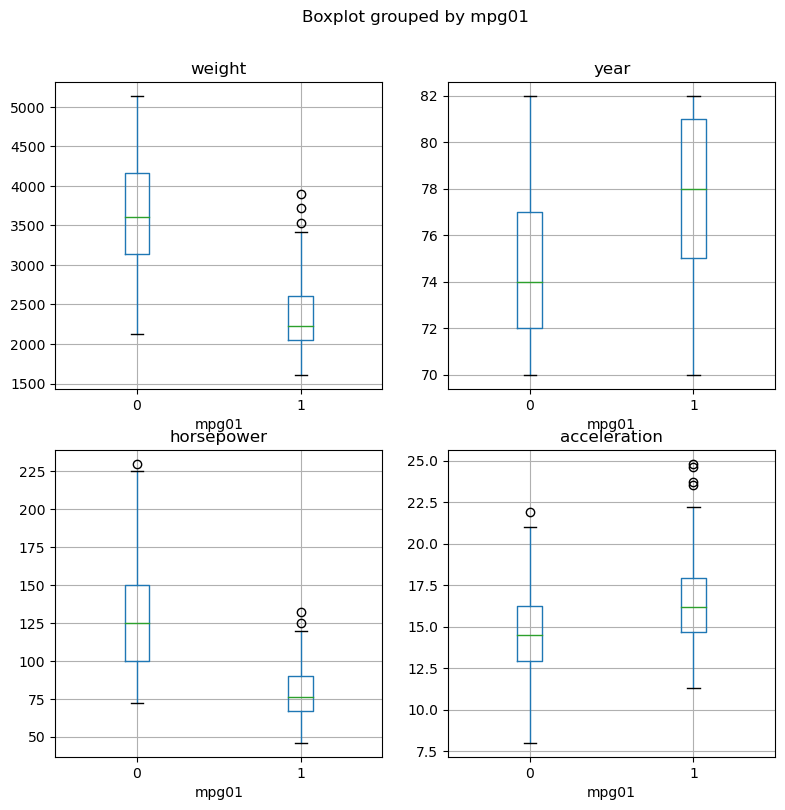

In [83]:
fig, ax = subplots(2,2,figsize=(9,9))
Auto.boxplot('weight',by='mpg01',ax=ax[0,0])
Auto.boxplot('year',by='mpg01',ax=ax[0,1])
Auto.boxplot('horsepower',by='mpg01',ax=ax[1,0])
Auto.boxplot('acceleration',by='mpg01',ax=ax[1,1])


b) The variables that appeared to have the most correlation with mpg01 were years, weight and horsepower.

c) The data in Auto is in year order and since year has an impact on mpg it would not make sense to use that to select the train/test sets.  So instead I shuffled the data randomly and used the first 100 rows as the test set, and the other 297 as the training. 

In [84]:
Auto_shuffled = Auto.sample(frac=1) 
Auto_shuffled

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
175,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
190,22.0,6,250.0,105,3353,14.5,76,1,chevrolet nova,0
289,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw),0
268,21.1,4,134.0,95,2515,14.8,78,3,toyota celica gt liftback,0
...,...,...,...,...,...,...,...,...,...,...
88,15.0,8,318.0,150,3777,12.5,73,1,dodge coronet custom,0
67,13.0,8,350.0,155,4502,13.5,72,1,buick lesabre custom,0
362,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier,1
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0


c) Now that the data is shuffled it can be split into test and training sets.  I also added another column called "train" 

In [85]:
test_set = Auto_shuffled.iloc[:100]
train_set = Auto_shuffled.iloc[100:]
print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)
Auto_shuffled['train'] = 0 
Auto_shuffled.loc[100:, 'train'] = 1 
Auto_shuffled

Training set shape: (292, 10)
Test set shape: (100, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01,train
175,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0
190,22.0,6,250.0,105,3353,14.5,76,1,chevrolet nova,0,0
289,19.2,8,267.0,125,3605,15.0,79,1,chevrolet malibu classic (sw),0,0
268,21.1,4,134.0,95,2515,14.8,78,3,toyota celica gt liftback,0,0
...,...,...,...,...,...,...,...,...,...,...,...
88,15.0,8,318.0,150,3777,12.5,73,1,dodge coronet custom,0,1
67,13.0,8,350.0,155,4502,13.5,72,1,buick lesabre custom,0,1
362,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier,1,1
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0,1


d) LDA model on the training date.  The test data is row 0-99 of the shuffled data set and 100-end is the training.

In [86]:

lda = LDA(store_covariance=True)
model = MS(['year','weight','horsepower']).fit(Auto_shuffled)
X = model.transform(Auto_shuffled)
X_train, X_test =X.iloc[100:],X.iloc[:100]
L_train, L_test = Auto_shuffled['mpg01'].iloc[100:], Auto_shuffled['mpg01'].iloc[:100]
X_train, X_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]]
lda.fit(X_train,L_train)


LinearDiscriminantAnalysis(store_covariance=True)

In [87]:
lda_pred = lda.predict(X_test)

In [88]:
confusion_table(lda_pred, L_test)

Truth,0,1
Predicted,,
0,40,1
1,9,50


In [89]:
(40+50)/(40+1+9+50)

0.9

d) The LDA model had a test error of just 10% 

e) QDA model on same training data.

In [90]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [91]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred,L_test)

Truth,0,1
Predicted,,
0,40,4
1,9,47


In [92]:
(40+47)/(40+4+9+47)

0.87

e) The QDA model had a test error of 13% 

f) Logistic Regression model

In [95]:
glm_train = sm.GLM(L_train, X_train, family=sm.families.Binomial())
results=glm_train.fit()
probs = results.predict(exog=X_test)
labels=np.array([0]*100)
labels[probs>0.5] = 1
confusion_table(labels,L_test)


Truth,0,1
Predicted,,
0,42,2
1,7,49


In [96]:
(42+49)/(42+2+7+49)

0.91

f) Logist Regression test error of only 9%.  This is the lowest of all of them so far.

g) Naive Bayes model

In [97]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [98]:
nb_labels=NB.predict(X_test)
confusion_table(nb_labels,L_test)

Truth,0,1
Predicted,,
0,38,2
1,11,49


In [99]:
(38+49)/(38+2+11+49)

0.87

g) Naive Bayes error rate of 13%

h) KNN with several different values of k used. 1,3,6,10

In [100]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,0,1
Predicted,,
0,44,7
1,5,44


In [102]:
(44+44)/(44+7+5+44)
np.mean(knn1_pred==L_test)

0.88

In [104]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, L_train)
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred, L_test)

Truth,0,1
Predicted,,
0,42,5
1,7,46


In [106]:
np.mean(knn3_pred==L_test)

0.88

In [105]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, L_train)
knn6_pred = knn6.predict(X_test)
confusion_table(knn6_pred, L_test)

Truth,0,1
Predicted,,
0,44,11
1,5,40


In [107]:
np.mean(knn6_pred==L_test)

0.84

In [109]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, L_train)
knn10_pred = knn6.predict(X_test)
confusion_table(knn10_pred, L_test)

Truth,0,1
Predicted,,
0,44,11
1,5,40


In [110]:
np.mean(knn10_pred==L_test)

0.84

h) The lowest error rate were for k=1 and k=3 both with 12% error.  Higher k values of 6 and 10 had error rates of 16%.